In [2]:
import numpy as np
import pandas as pd
import random

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition  import PCA

In [3]:
df = pd.read_csv('ParkinsonDatabase.csv')

In [4]:
df.drop(['ID','Recording'],axis = 1, inplace = True)

In [5]:
df

,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.263130,0.017463,0.019660,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.202170,0.013010,0.014097,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.167100,0.011049,0.012683,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.208920,0.014525,0.015696,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.116070,0.006461,0.008385,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023
5,0,0,0.16489,0.000010,0.000819,0.001191,0.010666,0.094738,0.005518,0.006785,...,1.480657,1.675417,1.373460,1.709614,1.444187,1.383488,1.625396,1.651655,1.652845,1.427623
6,0,1,0.22506,0.000014,0.001358,0.001460,0.017181,0.148120,0.009609,0.011060,...,1.712147,1.419443,1.501822,1.503534,1.486685,1.648505,1.345959,1.741863,1.828781,1.655604
7,0,1,0.23086,0.000015,0.001349,0.001546,0.017775,0.157800,0.009262,0.011683,...,1.535326,1.627976,1.332839,1.254560,1.598743,1.297679,1.526714,1.647910,1.662981,1.609652
8,0,1,0.22898,0.000015,0.001375,0.001607,0.020110,0.175770,0.010571,0.013321,...,1.620783,1.431508,1.598949,1.394543,1.459370,1.313012,1.447470,1.354798,1.585025,1.334293
9,0,1,1.31000,0.000103,0.008245,0.006280,0.030742,0.270640,0.018590,0.016261,...,1.541010,1.347021,1.526148,1.428505,1.516130,1.491684,1.579521,1.374581,1.550638,1.572821


In [133]:
len(full_data)/3

80.0

In [6]:
full_data = df.astype(float).values.tolist()

In [18]:
final_data = []
for i in range(0,len(full_data),3):
    final_data.append((np.array(full_data[i])+np.array(full_data[i+1])+np.array(full_data[i+2]))/3)

In [20]:
final_data=np.array(final_data)

In [22]:
ss = StandardScaler()

In [23]:
transformed_data = ss.fit_transform(X=final_data[:,1:],y=final_data[:,0])

In [27]:
y = final_data[:,0]

In [28]:
len(y)

80

In [29]:
pc = PCA()

In [30]:
new_transformed_data = pc.fit_transform(X=transformed_data)

In [35]:
X = new_transformed_data[:,0:5]

In [36]:
full_data_with_PCA = np.append(y.reshape(-1,1),X,axis=1)

In [40]:
random.shuffle(full_data_with_PCA)

In [45]:
test_size = 0.2

train_data = full_data_with_PCA[:-int(test_size*len(full_data_with_PCA))]
test_data = full_data_with_PCA[-int(test_size*len(full_data_with_PCA)):]


In [48]:
len(train_data[0])

6

In [311]:
train_set = {0:[] , 1:[]} #We need our dataset in dictionary format so that we can use it in KNN function
test_set = {0:[] , 1:[]}
for i in train_data:
    train_set[i[0]].append(i[1:])
    #We took one-one list from train_data and appended the features from that list into dictionary 
    #with key as last element (label) of that list
for i in test_data:
    test_set[i[0]].append(i[1:]) #same process repeated for test data
train_set

{0: [array([ 0.20806632, -2.60669066,  0.38785657, -0.11040426, -0.74508856]),
  array([ 5.16929907, -2.16038882,  0.68305524, -0.50505027,  0.87865213]),
  array([ 5.16929907, -2.16038882,  0.68305524, -0.50505027,  0.87865213]),
  array([ 0.20806632, -2.60669066,  0.38785657, -0.11040426, -0.74508856]),
  array([ 5.16929907, -2.16038882,  0.68305524, -0.50505027,  0.87865213]),
  array([ 0.20806632, -2.60669066,  0.38785657, -0.11040426, -0.74508856]),
  array([ 5.16929907, -2.16038882,  0.68305524, -0.50505027,  0.87865213]),
  array([ 0.7205983 , -1.10575168, -0.61744514,  0.47895793, -0.41681288]),
  array([ 1.45816054, -1.05580752,  0.46439947,  0.84172629, -0.75608698]),
  array([ 0.20806632, -2.60669066,  0.38785657, -0.11040426, -0.74508856]),
  array([-3.43054615,  1.89406187,  1.70056734, -1.45619851, -0.77934697]),
  array([ 0.76333929,  3.12517628,  3.65902728,  1.8592427 , -0.54554043]),
  array([ 5.16929907, -2.16038882,  0.68305524, -0.50505027,  0.87865213]),
  array([

In [312]:
from collections import Counter

In [313]:
def knn(data,predict,k=3): #We define function so that we can reuse it afterwards for new dataset
    distances = []
    for group in data:#r
        for features in data[group]:
            distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([distance,group])
    votes = [i[1] for i in sorted(distances)[0:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [314]:
accuracy = [] #list to append accuracy in
z = [i for i in range(1,60,2)] #list of all values of k used below
for k in range(1,60,2):
    correct = 0
    total = len(test_data)
    for group in test_set:
        for data in test_set[group]: #data contains a list of 9 features x1,x2...x9
            vote = knn(train_set,data,k) #we check classification made by knn for data variable
            if group == vote: #if group of data variable = classification made by knn then correct += 1
                correct+=1
    accuracy.append(correct/total)

In [315]:
len(accuracy)

30

In [316]:
z[accuracy.index(max(accuracy))]

1

In [317]:
import matplotlib.pyplot as plt

1.0


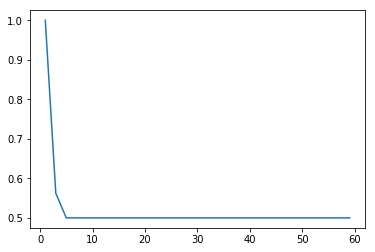

In [318]:
print(accuracy[0])
plt.plot(z,accuracy)
plt.show()

In [320]:
with open('train_set.txt','w') as f:
    f.write(str(train_set))